In [1]:
#-*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
diabetes=pd.read_csv('diabetes.txt')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [2]:
#默认5行
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#“结果”是我们将要预测的特征，0意味着未患糖尿病，1意味着患有糖尿病。在768个数据点中，500个被标记为0,268个标记为1。
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [5]:
#显示数据的维度
print("dimennsion of diabetes data:{}".format(diabetes.shape))

dimennsion of diabetes data:(768, 9)


Outcome
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

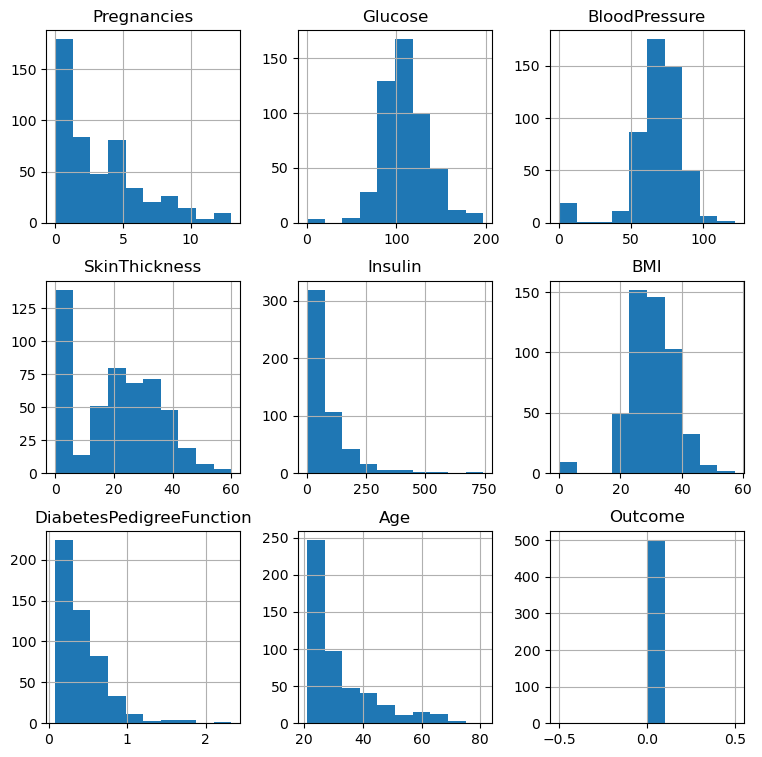

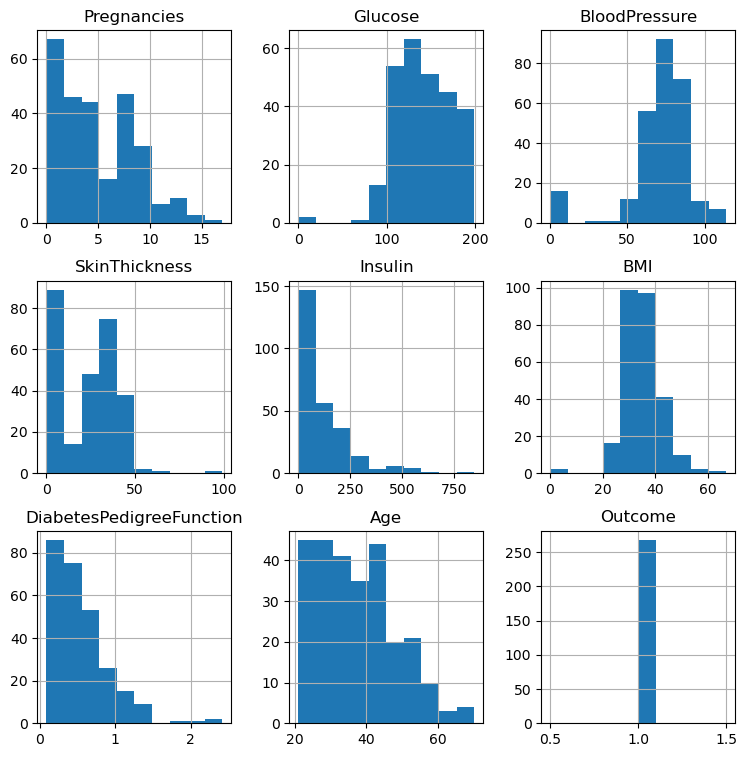

In [6]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

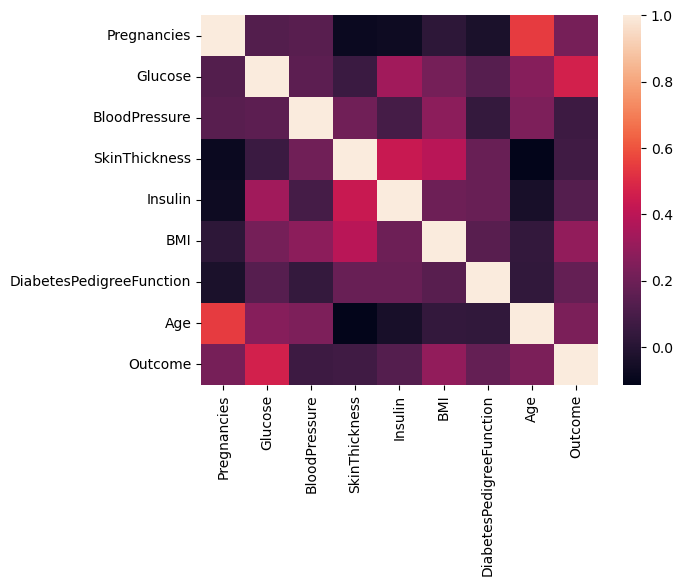

In [7]:
import seaborn as sns
corr = diabetes.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

<Axes: ylabel='count'>

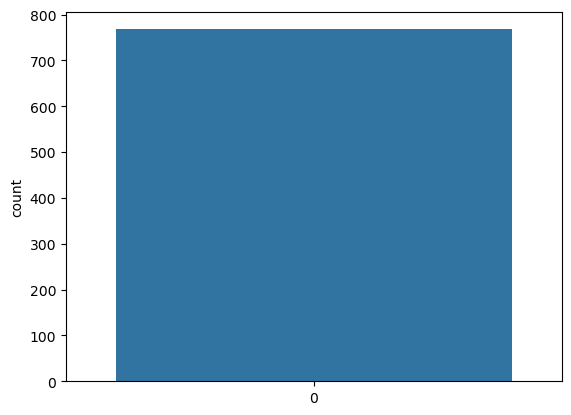

In [8]:
sns.countplot(diabetes['Outcome'],label="Count")

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#血压（Blood pressure）:通过分析数据，我们发现有些血压值为0。很明显，一个正常人的血压不可能为0，所以这些数据是错误的。
print("Blood pressure")
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())
print("\n")

#血糖水平（Plasma glucose levels）: 同样，人的血糖水平也不可能降至0，所以数据集中有5列血糖值异常。
print("Plasma glucose levels")
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())
print("\n")

#皮褶厚度（Skin Fold Thickness）: 正常人的皮褶厚度一般不会小于10mm，可以发现该参数共出现227次0值。
print("Skin Fold Thickness")
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count())
print("\n")

#身体质量指数（BMI）: 除非一个人体重降低到威胁生命的地步，否则BMI值不为0或者接近0。
print("BMI")
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())
print("\n")

#胰岛素（Insulin）: 在极特殊的情况下，人体胰岛素值才会降低到0，而我们发现共有374项数据的胰岛素值出现0值，这显然是不正常的。
print("Insulin")
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())
print("\n")


Blood pressure
Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64


Plasma glucose levels
Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64


Skin Fold Thickness
Total :  227
Outcome
0    139
1     88
Name: Age, dtype: int64


BMI
Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


Insulin
Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64




In [13]:
#划分数据集和测试集
#选取前460行，1-8列  作训练集
x_train=diabetes.iloc[0:459, 0:8]
#选取前460行，第9列  作训练集
y_train=diabetes.iloc[0:459, 8:9]
#选取460-768行，1-8列 作测试集
x_test=diabetes.iloc[459:767, 0:8]
#选取460-768行，第9列 作测试集
y_test=diabetes.iloc[459:767, 8:9]

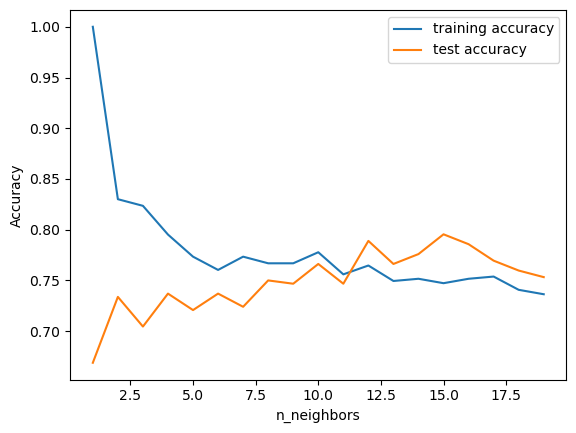

In [14]:
#首先用knn研究一下是否能够确认模型的复杂度和精确度之间的关系
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
#try n_neighbors from 1 to 20
neighbors_settings=range(1,20)
 
for n_neighbors in neighbors_settings:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train.values.ravel())
    #record training set accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    #record test set accuracy
    test_accuracy.append(knn.score(x_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [15]:
n_neighbors=15
knn=KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(x_train, y_train.values.ravel())
print(round(knn.score(x_train,y_train),4))
print(round(knn.score(x_test,y_test),4))


0.7473
0.7955


In [16]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix
y_pred_knn= knn.predict(x_test)
knnConMat=confusion_matrix(y_test,y_pred_knn)
knnConMat

D:\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[180,  35],
       [ 28,  65]], dtype=int64)

In [17]:
#逻辑回归算法

from sklearn.linear_model import LogisticRegression
LogisticRegression(multi_class="multinomial", solver="newton-cg")
#x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size= 0.8,test_size=0.2,random_state=28)
logreg=LogisticRegression().fit(x_train,y_train.values.ravel())
print("Training set score:{:.4f}".format(logreg.score(x_train, y_train)))#精确到小数点后三位
print("Test set score:{:.4f}".format(logreg.score(x_test,y_test)))

Training set score:0.7647
Test set score:0.8149


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#而将正则化参数C设置为100时，模型在训练集上准确度稍有提高但测试集上准确度略降，
#说明较少正则化和更复杂的模型并不一定会比默认参数模型的预测效果更好。
#所以我们选择默认值C=1
logreg100=LogisticRegression(C=100).fit(x_train,y_train.values.ravel())
print("Training set accuracy:{:.4f}".format(logreg100.score(x_train,y_train)))
print("Test set accuracy:{:.4f}".format(logreg100.score(x_test, y_test)))



Training set accuracy:0.7669
Test set accuracy:0.8117


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
y_pred_log = logreg.predict(x_test)
print(y_pred_log)

[1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1
 1 0 0 0 1 0 1 0 0 0 0 0]


In [20]:
from sklearn.metrics import confusion_matrix
logConMat=confusion_matrix(y_test, y_pred_log)
print(logConMat)

[[193  22]
 [ 35  58]]


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (8).

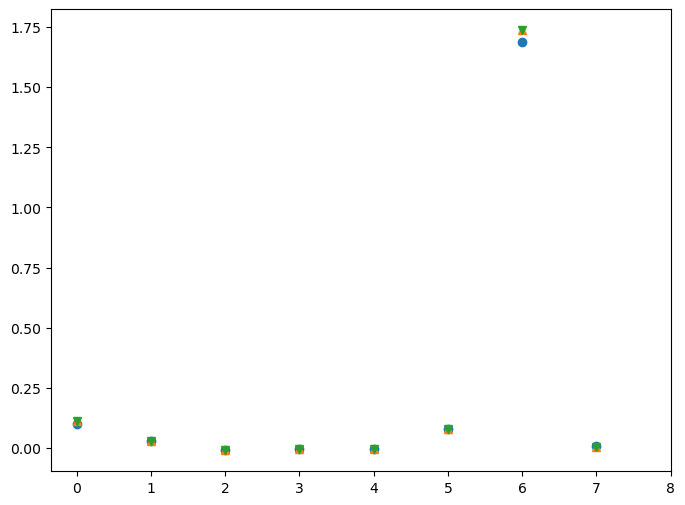

In [21]:
#用可视化的方式来看一下用三种不同正则化参数C所得模型的系数。
#更强的正则化(C = 0.001)会使系数越来越接近于零。仔细地看图，
#我们还能发现特征“DiabetesPedigreeFunction”（糖尿病遗传函数）在 C=100, C=1 和C=0.001的情况下, 系数都为正。
#这表明无论是哪个模型，DiabetesPedigreeFunction（糖尿病遗传函数）这个特征值都与样本为糖尿病是正相关的。
diabetes_features=[x for i,x in enumerate(diabetes. columns) if i!=8]
plt. figure(figsize=(8,6))
plt. plot(logreg. coef_.T,'o', label="C=1")
plt. plot(logreg100.coef_.T,'^', label="C=100")
plt. plot(logreg100.coef_.T,'v', label="C=0.001")
plt. xticks(range(diabetes. shape[1]), diabetes_features, rotation=90)
plt. hlines(0,0, diabetes. shape[1])
plt. ylim(-5,5)
plt. xlabel("Feature")
plt. ylabel("Coefficient magnitude")
plt. legend()
plt. savefig('1og_coef')




In [ ]:
#用随机森林算法进行研究
from sklearn. ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train,y_train.values.ravel())
print("Accuracy on training set:{:.4f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set:{:.4f}".format(rf.score(x_test, y_test)))
y_pred_rf=rf.predict(x_test)
rfConMat=confusion_matrix(y_test,y_pred_rf)
rfConMat

In [ ]:
#没有更改任何参数的随机森林有78.6%的准确度，比逻辑回归和单一决策树的预测效果更好。
#再试试调整max_features设置，看看效果是否能够提高。
#可以看到结果并没有提高，这表明默认参数的随机森林在这里效果很好。
rf1=RandomForestClassifier(max_depth=3,n_estimators=100, random_state=0)
rf1.fit(x_train,y_train.values.ravel())
print("Accuracy on training set:{:.4f}". format(rf1.score(x_train, y_train)))
print("Accuracy on test set:{:.4f}". format(rf1.score(x_test, y_test)))

In [22]:
#深度学习算法
#从结果中我们可以看到，多层神经网络（MLP）的预测准确度并不如其他模型表现的好，这可能是数据的尺度不同造成的。

from sklearn.neural_network import MLPClassifier 
mlp=MLPClassifier(random_state=42)
mlp.fit(x_train,y_train.values.ravel())
print("Accuracy on training set:{:.4f}". format(mlp. score(x_train, y_train)))
print("Accuracy on test set:{:.4f}". format(mlp. score(x_test, y_test)))
y_pred_mlp=mlp.predict(x_test)
print(y_pred_mlp)



Accuracy on training set:0.7429
Accuracy on test set:0.6916
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 0 0]


In [23]:
#深度学习算法同样也希望所有输入的特征在同一尺度范围内变化。
#理想情况下，是均值为0，方差为1。所以，我们必须重新标准化我们的数据，以便能够满足这些需求。
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
x_train_scaled=x_train_scaled.astype(np.float64)
x_test_scaled=x_test_scaled.astype(np.float64)
mlp=MLPClassifier(random_state=0)
mlp.fit(x_train_scaled,y_train.values.ravel())
print("Accuracy on training set:{:.4f}".format(mlp.score(x_train_scaled,y_train)))
print("Accuracy on test set:{:.4f}".format(mlp. score(x_test_scaled, y_test)))


Accuracy on training set:0.8017
Accuracy on test set:0.7987


D:\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [175]:
#增加迭代次数：
#从结果可以发现，增加迭代次数仅仅提升了训练集的性能，而对测试集没有效果。
#max_iter=1000
mlp=MLPClassifier(max_iter=10000, random_state=0)
mlp.fit(x_train_scaled,y_train.values.ravel())
print("Accuracy on training set:{:.4f}". format(mlp.score(x_train_scaled,y_train)))
print("Accuracy on test set:{:.4f}". format(mlp. score(x_test_scaled, y_test)))

Accuracy on training set:0.9521
Accuracy on test set:0.7435


In [177]:
#使用调高alpha参数并且加强权重的正则化的方法。
#从运行结果来看，这个结果是好的，但我们无法更进一步提升测试集准确度。
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=10000, alpha=1, random_state=0)
mlp.fit(x_train_scaled,y_train.values.ravel())
print("Accuracy on training set:{:.4f}".format(mlp.score(x_train_scaled,y_train)))
print("Accuracy on test set:{:.4f}".format(mlp.score(x_test_scaled, y_test)))
mlpConMat=confusion_matrix(y_test,y_pred_mlp)
mlpConMat


Accuracy on training set:0.7887
Accuracy on test set:0.8214


array([[183,  32],
       [ 63,  30]], dtype=int64)

结论：因此，到目前为止我们最好的模型是在数据标准化后的默认参数深度学习模型。

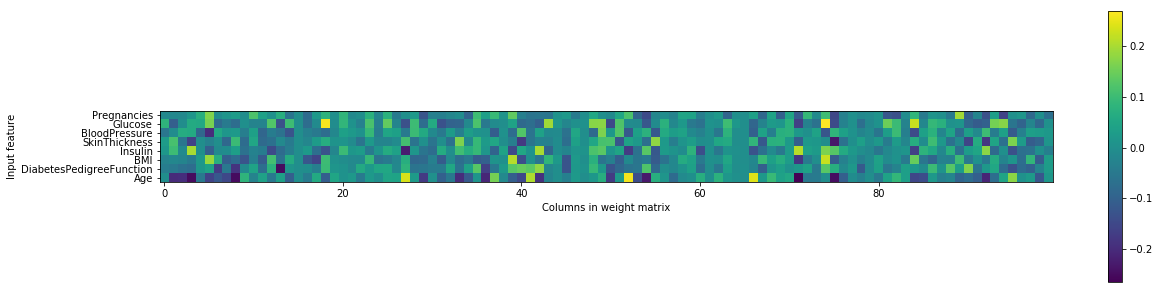

In [153]:
#一个在糖尿病数据集上学习的神经网络的第一层权重热图。
#热度图中，快速指出哪个或哪些特征的权重较高或较低是不容易的。
plt. figure(figsize=(20,5))
#plt. imshow(mlp.coefs_[0], interpolation=' none', cmap='viridis')
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()